In [1]:
import pandas as pd
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np

Dubai / 동 / 선박운임료 / 석탄의 경우 Bloomberg Terminal 활용하여 확보
코로나 관련 데이터는 깃허브의 csv파일로 확보
S&P Energy 가격은 Investing.com을 통해 csv파일로 확보하였다.
그 외의 데이터는 Pandas_datareader 와 FinanceDataReader를 통해 확보하였다.

# 데이터 합치기 및 확인(+EDA)

데이터 별 특징 정리:

2020년 코로나 데이터를 포함하는 데이터 = 코로나 / 비트코인

In [2]:
df_2008 = pd.read_csv('data/df_2008.csv')
df_2008

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,Dollar,Snp,Open,High,Low,Volume,Energy
0,2008-02-01,89.03,91.41,7.740,933.00,7230.0,6134.0,75.565,1395.42,537.15,544.62,534.29,238.36M,540.81
1,2008-02-04,90.07,91.09,7.869,899.50,7260.0,6121.0,75.470,1380.82,540.81,544.41,535.15,188.02M,541.30
2,2008-02-05,88.32,89.60,7.942,889.75,7130.0,6032.0,76.285,1336.64,541.29,541.29,521.00,243.54M,521.00
3,2008-02-06,87.16,88.73,7.994,892.00,7330.0,6002.0,76.300,1326.45,520.99,527.14,511.26,243.06M,512.79
4,2008-02-07,88.07,88.55,8.102,908.25,7540.0,6135.0,77.120,1336.91,512.10,523.59,507.85,234.50M,518.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,93.961,4438.23,427.19,433.94,427.19,167.51M,432.43
3339,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,93.938,4471.37,432.43,438.73,432.43,173.94M,434.44
3340,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,93.945,4486.48,434.44,441.08,432.57,217.66M,434.89
3341,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,93.728,4519.63,434.89,441.40,434.47,175.70M,439.87


In [3]:
df_2020 = pd.read_csv('data/df_2020.csv')
df_2020

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Open,High,Low,Volume,Energy
0,2020-01-02,61.17,67.05,2.122,1520.55,6188.0,976.0,0.0,0.0,96.525,6967.0,3257.85,456.46,460.93,456.46,133.61,460.34
1,2020-01-03,63.00,69.08,2.130,1547.40,6129.5,907.0,0.0,0.0,96.521,7343.1,3234.85,460.34,465.54,456.81,171.55,458.77
2,2020-01-06,63.27,70.25,2.135,1576.85,6138.5,844.0,0.0,0.0,96.350,7759.1,3246.28,458.77,464.81,458.77,195.33,462.34
3,2020-01-07,62.70,68.74,2.162,1566.50,6149.0,791.0,0.0,0.0,96.702,8155.7,3237.18,462.34,462.34,455.75,197.25,461.39
4,2020-01-08,59.65,67.31,2.141,1582.85,6178.0,773.0,0.0,0.0,96.996,8059.6,3253.05,461.39,461.39,452.84,187.23,453.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,1407791.0,63331126.0,93.961,57345.8,4438.23,427.19,433.94,427.19,167.51,432.43
437,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,1458486.0,68354252.0,93.938,61672.5,4471.37,432.43,438.73,432.43,173.94,434.44
438,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,1339231.0,69279898.0,93.945,62056.3,4486.48,434.44,441.08,432.57,217.66,434.89
439,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,1419351.0,79280514.0,93.728,64278.5,4519.63,434.89,441.40,434.47,175.70,439.87


## EDA 및 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_hm

NameError: name 'df_hm' is not defined

In [ ]:
df_hm=df_2008.drop(['Open','High', 'Low'],axis=1)
df_hm.head()
df_hm_corr = df_hm.corr()
df_hm_corr

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_hm_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

In [ ]:
X= df_hm.index
y1= df_hm.WTI
y2= df_hm.Brent
y3= df_hm.Gas
y4= df_hm.Gold
y5= df_hm.Copper
y6= df_hm.Bdiy
y7= df_hm.Dollar
y8= df_hm.Snp
#y9= df_hm.Volume
y10= df_hm.Energy

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(X, y1, label = 'WTI')
plt.plot(X, y2, label = 'Brent')
plt.plot(X, y3, label = 'Gas')
plt.plot(X, y4, label = 'Gold')
plt.plot(X, y5, label = 'Copper')
plt.plot(X, y6, label = 'Bdiy')
plt.plot(X, y7, label = 'Dollar')
plt.plot(X, y8, label = 'SNP')
plt.plot(X, y10, label = 'Energy')

plt.legend(loc='upper left')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [ ]:
X = df_hm.iloc[:,1:-2]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2008['Energy']

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

## 1.1.2 2020년 데이터 시각화및 EDA

In [ ]:
df_hm2=df_2020.drop(['Open','High', 'Low'],axis=1)
df_hm2.head()
df_hm2_corr = df_hm2.corr()
df_hm2_corr

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_hm2_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

In [ ]:
X = df_hm2.iloc[:,1:-1]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2020['Energy']

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

# Feature Selection
- 과도한 상관관계 / 또는 높은 설명력을 가진 변수의 경우 제외하기로 결정하였다
    Crewd Oil 과 (Open / High / Low) 의 값은 우선 제거하여 돌려보기로 하였다.(이 값은 조금 생각해 보고)
- Copper의 경우 회귀분석에 있어서 너무 높은 pvalue를 보여 우선적으로 탈락

In [9]:
X1 = df_2008[['WTI','Gas','Gold','Bdiy','Dollar','Snp']]
y1 = df_2008['Energy']

In [10]:
X2 = df_2020.drop(['Date','Brent'], axis =1)
y2 = df_2020['Energy']

Train/Test Split

In [11]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array(X1)
y = np.array(y1)

ts_cv = TimeSeriesSplit(
    n_splits=3,
    gap=0,
    max_train_size=3000,
    test_size=500,
)
all_splits = list(ts_cv.split(X1, y1))
train_0, test_0 = all_splits[0]
train_1, test_1 = all_splits[1]
train_2, test_2 = all_splits[2]

In [12]:
X = np.array(X2)
y = np.array(y2)

ts_cv = TimeSeriesSplit(
    n_splits=3,
    gap=0,
    max_train_size=3000,
    test_size=100,
)
all_splits = list(ts_cv.split(X2, y2))
train_0, test_0 = all_splits[0]
train_1, test_1 = all_splits[1]
train_2, test_2 = all_splits[2]

In [13]:
# 시각화
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

cmap_data = plt.cm.Paired 
cmap_cv = plt.cm.coolwarm 
plt.style.use('fivethirtyeight')

def plot_cv_indices(cv, X, n_splits, lw=10): 
  fig, ax = plt.subplots() 
  """Create a sample plot for indices of a cross-validation object.""" 
  
  # Generate the training/testing visualizations for each CV split 
  for ii, (tr, tt) in enumerate(cv.split(X=X)): 
    # Fill in indices with the training/test groups 
    indices = np.array([np.nan] * len(X)) 
    indices[tt] = 1 
    indices[tr] = 0 
    
    # Visualize the results 
    ax.scatter(range(len(indices)), [ii + .5] * len(indices),
               c=indices, marker='_', lw=lw, cmap=cmap_cv, 
               vmin=-.2, vmax=1.2) 
    # Formatting 
    yticklabels = list(range(n_splits)) 
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels, 
           xlabel='Sample index', ylabel="CV iteration", 
           ylim=[n_splits+0.1, -.1], xlim=[0, len(X)]) 
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15) 
    
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))], 
              ['Testing set', 'Training set'], loc=(1.02, .8))


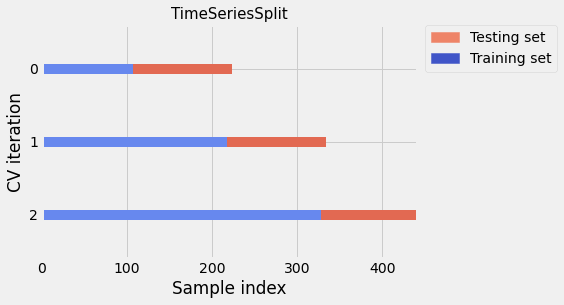

In [14]:
n_split= 3
tscv= TimeSeriesSplit(n_splits=n_split)
plot_cv_indices(tscv, X, n_splits=n_split)

LSTM

In [15]:
from sklearn.preprocessing import MinMaxScaler
def Scaler(X,y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    trainX = scaler.transform(X)
    y = np.reshape(y ,(-1,1)) # 스케일러에 들어가려면 reshape이 필요함
    scaler = scaler.fit(y)
    trainy = scaler.transform(y)
    # LSTM 을 위한 reshape
    tX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    ty = trainy
    return tX, ty, scaler

In [16]:
tX, ty, scaler = Scaler(X,y)

In [197]:
tX.shape

(441, 15, 1)

In [17]:
ty[test_2].shape

(100, 1)

3개의 train 구분에 대하여 각각의 모델 적용 하는 함수를 작성해야 한다.

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN , LSTM , GRU , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
tf.random.set_seed(1)
model = Sequential()
model.add(LSTM(16, 
               input_shape=(tX.shape[1],tX.shape[2]), 
               activation='tanh', 
               return_sequences=True)
          )
model.add(LSTM(4, activation = 'tanh'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 16)            1152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 1,493
Trainable params: 1,493
Non-trainable params: 0
_________________________________________________________________


In [21]:
def Train(xtrain,ytrain,xtest,ytest,number):
    model.compile(loss='mae' , optimizer='adam')
    earlyStopping = EarlyStopping(min_delta=0.001, monitor = 'loss', patience = 100, restore_best_weights = True)
    modelCheckPoint = ModelCheckpoint(filepath = f'best_model_{number}.h5', monitor = 'val_loss')
    
    hist = model.fit(xtrain, ytrain ,epochs=1000,validation_data=(xtest,ytest ), batch_size = 100, callbacks = [earlyStopping, modelCheckPoint] )
    
    #graph
    yhat = model.predict(xtest)
    print(f'mse evaluate : {np.average(yhat-ytest)}')
    print(yhat.shape,ytest.shape)

    plt.plot(yhat, label="LSTM")
    plt.plot(ytest, label="real")
    plt.legend()

Epoch 1/1000
2/2 [==============================] - 11s 2s/step - loss: 0.0362 - val_loss: 0.0848
Epoch 2/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.0310 - val_loss: 0.0788
Epoch 3/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0263 - val_loss: 0.0571
Epoch 4/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.0238 - val_loss: 0.0536
Epoch 5/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.0246 - val_loss: 0.0618
Epoch 6/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.0219 - val_loss: 0.0734
Epoch 7/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.0243 - val_loss: 0.0698
Epoch 8/1000
2/2 [==============================] - 0s 70ms/step - loss: 0.0228 - val_loss: 0.0605
Epoch 9/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.0222 - val_loss: 0.0588
Epoch 10/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.0222 - val_loss: 0.0642
Epoch 11/1

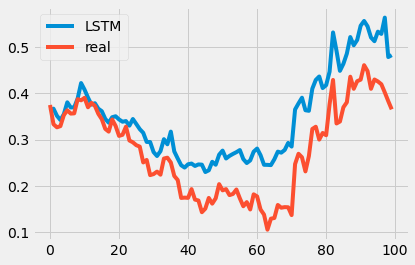

In [204]:
Train(tX[train_0],ty[train_0], tX[test_0],ty[test_0],1)

Epoch 1/1000
3/3 [==============================] - 9s 899ms/step - loss: 0.0443 - val_loss: 0.1548
Epoch 2/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0363 - val_loss: 0.1744
Epoch 3/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0348 - val_loss: 0.1582
Epoch 4/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0313 - val_loss: 0.1127
Epoch 5/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0306 - val_loss: 0.0945
Epoch 6/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.0282 - val_loss: 0.0950
Epoch 7/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.0278 - val_loss: 0.0768
Epoch 8/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.0267 - val_loss: 0.0501
Epoch 9/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.0267 - val_loss: 0.0410
Epoch 10/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.0266 - val_loss: 0.0436
Epoch 11

Epoch 83/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0237 - val_loss: 0.0398
Epoch 84/1000
3/3 [==============================] - 0s 55ms/step - loss: 0.0234 - val_loss: 0.0429
Epoch 85/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.0235 - val_loss: 0.0392
Epoch 86/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0244 - val_loss: 0.0409
Epoch 87/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0234 - val_loss: 0.0463
Epoch 88/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0242 - val_loss: 0.0395
Epoch 89/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0237 - val_loss: 0.0405
Epoch 90/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0236 - val_loss: 0.0426
Epoch 91/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0230 - val_loss: 0.0390
Epoch 92/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0242 - val_loss: 0.0418


3/3 [==============================] - 0s 51ms/step - loss: 0.0221 - val_loss: 0.0713
Epoch 165/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0219 - val_loss: 0.0697
Epoch 166/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0214 - val_loss: 0.0719
Epoch 167/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.0213 - val_loss: 0.0701
Epoch 168/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.0220 - val_loss: 0.0707
Epoch 169/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.0210 - val_loss: 0.0754
Epoch 170/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0212 - val_loss: 0.0733
Epoch 171/1000
3/3 [==============================] - 0s 55ms/step - loss: 0.0212 - val_loss: 0.0736
Epoch 172/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0208 - val_loss: 0.0736
Epoch 173/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0209 - val_loss: 0.0732
Epoch

3/3 [==============================] - 0s 41ms/step - loss: 0.0183 - val_loss: 0.1231
Epoch 327/1000
3/3 [==============================] - 0s 54ms/step - loss: 0.0178 - val_loss: 0.1236
Epoch 328/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0176 - val_loss: 0.1241
Epoch 329/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0176 - val_loss: 0.1253
Epoch 330/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.0182 - val_loss: 0.1196
Epoch 331/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0175 - val_loss: 0.1235
Epoch 332/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0182 - val_loss: 0.1270
Epoch 333/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.0186 - val_loss: 0.1226
Epoch 334/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0182 - val_loss: 0.1243
Epoch 335/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0178 - val_loss: 0.1262
Epoch

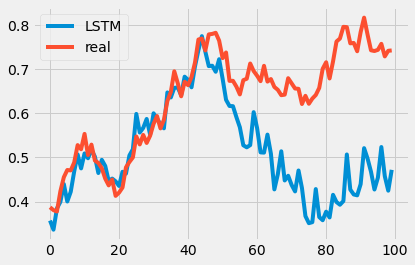

In [205]:
Train(tX[train_1],ty[train_1], tX[test_1],ty[test_1],2)

Epoch 1/1000
4/4 [==============================] - 7s 501ms/step - loss: 0.4978 - val_loss: 0.7356
Epoch 2/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.4263 - val_loss: 0.6348
Epoch 3/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.3487 - val_loss: 0.5206
Epoch 4/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.2704 - val_loss: 0.3928
Epoch 5/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.2032 - val_loss: 0.2551
Epoch 6/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1705 - val_loss: 0.1397
Epoch 7/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.1716 - val_loss: 0.1010
Epoch 8/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.1759 - val_loss: 0.1007
Epoch 9/1000
4/4 [==============================] - 0s 61ms/step - loss: 0.1700 - val_loss: 0.1239
Epoch 10/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.1608 - val_loss: 0.1615
Epoch 11

Epoch 83/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0271 - val_loss: 0.0470
Epoch 84/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0268 - val_loss: 0.0416
Epoch 85/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0267 - val_loss: 0.0512
Epoch 86/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0268 - val_loss: 0.0391
Epoch 87/1000
4/4 [==============================] - 0s 55ms/step - loss: 0.0262 - val_loss: 0.0467
Epoch 88/1000
4/4 [==============================] - 0s 95ms/step - loss: 0.0263 - val_loss: 0.0335
Epoch 89/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0264 - val_loss: 0.0483
Epoch 90/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0265 - val_loss: 0.0365
Epoch 91/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0256 - val_loss: 0.0370
Epoch 92/1000
4/4 [==============================] - 0s 95ms/step - loss: 0.0255 - val_loss: 0.0339


4/4 [==============================] - 0s 37ms/step - loss: 0.0213 - val_loss: 0.0328
Epoch 165/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0206 - val_loss: 0.0350
Epoch 166/1000
4/4 [==============================] - 0s 62ms/step - loss: 0.0210 - val_loss: 0.0286
Epoch 167/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0210 - val_loss: 0.0375
Epoch 168/1000
4/4 [==============================] - 0s 74ms/step - loss: 0.0209 - val_loss: 0.0376
Epoch 169/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0207 - val_loss: 0.0364
Epoch 170/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0206 - val_loss: 0.0348
Epoch 171/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0208 - val_loss: 0.0306
Epoch 172/1000
4/4 [==============================] - 0s 74ms/step - loss: 0.0209 - val_loss: 0.0382
Epoch 173/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0208 - val_loss: 0.0319
Epoch

4/4 [==============================] - 0s 24ms/step - loss: 0.0195 - val_loss: 0.0297
Epoch 246/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0200 - val_loss: 0.0323
Epoch 247/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0195 - val_loss: 0.0300
Epoch 248/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0197 - val_loss: 0.0417
Epoch 249/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0204 - val_loss: 0.0284
Epoch 250/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0213 - val_loss: 0.0419
Epoch 251/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0205 - val_loss: 0.0287
Epoch 252/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0198 - val_loss: 0.0367
Epoch 253/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0198 - val_loss: 0.0312
Epoch 254/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0197 - val_loss: 0.0317
Epoch

4/4 [==============================] - 0s 55ms/step - loss: 0.0197 - val_loss: 0.0392
Epoch 327/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0201 - val_loss: 0.0274
Epoch 328/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0204 - val_loss: 0.0410
Epoch 329/1000
4/4 [==============================] - 1s 161ms/step - loss: 0.0198 - val_loss: 0.0283
Epoch 330/1000
4/4 [==============================] - 0s 53ms/step - loss: 0.0196 - val_loss: 0.0352
Epoch 331/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0189 - val_loss: 0.0277
Epoch 332/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0192 - val_loss: 0.0414
Epoch 333/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0196 - val_loss: 0.0280
Epoch 334/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0201 - val_loss: 0.0382
Epoch 335/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0190 - val_loss: 0.0279
Epoc

Epoch 407/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0184 - val_loss: 0.0318
Epoch 408/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0185 - val_loss: 0.0309
Epoch 409/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0182 - val_loss: 0.0322
Epoch 410/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0182 - val_loss: 0.0353
Epoch 411/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0186 - val_loss: 0.0283
Epoch 412/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0190 - val_loss: 0.0330
Epoch 413/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0192 - val_loss: 0.0274
Epoch 414/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0192 - val_loss: 0.0370
Epoch 415/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0185 - val_loss: 0.0298
Epoch 416/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0186 - val_los

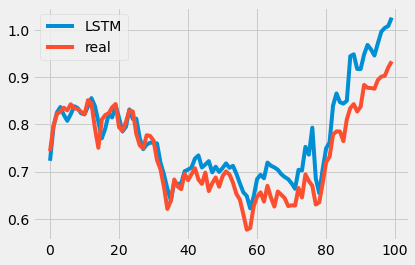

In [22]:
Train(tX[train_2],ty[train_2], tX[test_2],ty[test_2],3)

In [ ]:
#inverse scaler
scaler.inverse_transform(yhat)

# S&P500 Energy 섹터 소속 5개 회사
### 파마 프랜치 모델의 적용과 비교를 위해 주요 5개 회사를 선정, LSTM모델과의 성능 ( 수익률)차이를 계산해 보도록 하겠다

In [31]:
### ExxonMobil 불러오기

df_XOM = fdr.DataReader('XOM', '2008-01-01', '2021-10-21')
df_XOM

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,93.51,94.15,94.55,92.78,23350000.0,-0.0019
2008-01-03,93.83,93.86,94.74,93.51,19170000.0,0.0034
2008-01-04,92.08,93.24,94.36,91.88,24730000.0,-0.0187
2008-01-07,91.22,92.50,93.15,90.25,28940000.0,-0.0093
2008-01-08,90.05,91.86,92.05,89.68,21760000.0,-0.0128
...,...,...,...,...,...,...
2021-10-15,62.59,62.73,63.07,62.44,16090000.0,0.0095
2021-10-18,62.56,63.09,63.14,62.27,18270000.0,-0.0005
2021-10-19,63.50,62.87,63.61,62.67,18930000.0,0.0150


In [32]:
### Chevron Corporation 불러오기

df_CVX = fdr.DataReader('CVX', '2008-01-01', '2021-10-21')
df_CVX

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,93.46,93.96,94.69,92.71,9060000.0,0.0014
2008-01-03,94.61,93.80,94.84,93.46,10480000.0,0.0123
2008-01-04,93.35,93.88,95.21,93.20,13100000.0,-0.0133
2008-01-07,92.13,93.74,93.74,91.15,12890000.0,-0.0131
2008-01-08,90.95,92.41,93.38,90.58,10990000.0,-0.0128
...,...,...,...,...,...,...
2021-10-15,109.61,109.77,110.03,109.43,9970000.0,0.0074
2021-10-18,109.56,110.22,110.41,108.96,10500000.0,-0.0005
2021-10-19,111.70,110.16,111.70,109.79,10360000.0,0.0195


In [33]:
### ConocoPhillips 불러오기

df_COP = fdr.DataReader('COP', '2008-01-01', '2021-10-21')
df_COP

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,67.00,67.66,68.39,66.22,11500000.0,-0.0046
2008-01-03,67.27,67.09,67.88,67.09,8590000.0,0.0040
2008-01-04,65.22,66.38,66.94,65.10,11120000.0,-0.0305
2008-01-07,64.33,65.75,65.93,63.87,13550000.0,-0.0136
2008-01-08,62.90,64.68,65.26,62.72,12370000.0,-0.0222
...,...,...,...,...,...,...
2021-10-15,74.14,74.63,74.93,74.13,6950000.0,0.0039
2021-10-18,74.50,74.77,75.75,74.13,9910000.0,0.0049
2021-10-19,75.32,74.84,75.85,74.38,6590000.0,0.0110


In [34]:
### Marathon Oil 불러오기

df_MRO = fdr.DataReader('MRO', '2008-01-01', '2021-10-21')
df_MRO

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,37.27,37.03,37.61,37.03,5690000.0,0.0087
2008-01-03,37.56,37.47,38.38,37.03,4800000.0,0.0078
2008-01-04,36.16,37.24,37.24,36.09,5970000.0,-0.0373
2008-01-07,35.79,36.11,36.58,35.42,7500000.0,-0.0102
2008-01-08,35.56,36.38,36.78,35.43,8520000.0,-0.0064
...,...,...,...,...,...,...
2021-10-15,16.18,16.42,16.53,16.16,12690000.0,0.0025
2021-10-18,16.43,16.48,16.84,16.24,25240000.0,0.0155
2021-10-19,16.39,16.46,16.62,16.27,18510000.0,-0.0024


In [35]:
### Kinder Morgan 불러오기

df_KMI = fdr.DataReader('KMI', '2008-01-01', '2021-10-21')
df_KMI

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2011-02-14,30.70,31.05,31.30,30.70,6280000.0,-0.0113
2011-02-15,30.94,30.90,31.15,30.73,4340000.0,0.0078
2011-02-16,30.72,31.05,31.44,30.66,4630000.0,-0.0071
2011-02-17,30.55,30.68,31.09,30.51,3290000.0,-0.0055
2011-02-18,31.37,30.65,31.39,30.40,6940000.0,0.0268
...,...,...,...,...,...,...
2021-10-15,18.46,18.44,18.61,18.39,12250000.0,0.0044
2021-10-18,18.47,18.56,18.76,18.35,15530000.0,0.0005
2021-10-19,18.45,18.56,18.61,18.34,10010000.0,-0.0011


# 파마 프렌치 모델

In [38]:
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff
import statsmodels.api as smf

In [39]:
test_ff = ff.get_available_datasets()

In [40]:
df_12_industry = [test_fff for test_fff in test_ff if '12_Industry_Portfolios' in test_fff and 'Industry_Portfolios' in test_fff]

In [41]:
ds_industry = web.DataReader(df_12_industry[2],'famafrench', start='2008-01-01', end='2021-10-21')
print(ds_industry)

{0:             NoDur  Durbl  Manuf  Enrgy  Chems  BusEq  Telcm  Utils  Shops  \
Date                                                                        
2008-01-02  -1.22  -2.13  -1.76   0.50  -1.13  -1.95  -1.53  -1.10  -1.80   
2008-01-03   0.60  -0.92   0.43   0.36   0.27  -0.18  -0.13   0.19  -1.77   
2008-01-04  -1.10  -3.64  -2.96  -2.41  -1.52  -4.18  -1.99  -0.22  -2.52   
2008-01-07   1.98   0.17  -1.37  -1.00   0.12  -0.93   0.59   1.79   1.05   
2008-01-08  -0.13  -2.62  -2.42  -1.52  -1.04  -2.62  -2.65  -0.14  -1.94   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-09-24  -0.24   1.71  -0.64   0.79  -0.23   0.14  -0.22  -0.11   0.31   
2021-09-27  -0.02   1.90   0.70   3.81  -0.02  -1.05   0.37  -0.56   0.01   
2021-09-28  -1.40  -1.52  -1.66   0.21  -1.06  -3.21  -1.41  -1.15  -2.11   
2021-09-29   0.72   0.18  -0.13   0.06   0.36  -0.33   0.52   1.16   0.24   
2021-09-30  -2.12  -0.96  -1.81  -1.19  -1.49  -0.42  -0.94  -0.93  -1.7

In [42]:
print(ds_industry.keys())
print(ds_industry['DESCR'])

dict_keys([0, 1, 'DESCR'])
12 Industry Portfolios daily
----------------------------

This file was created by CMPT_IND_RETS_DAILY using the 202109 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (3462 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Daily (3462 rows x 12 cols)


In [43]:
ds_industry[0].tail()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2021-09-24,-0.24,1.71,-0.64,0.79,-0.23,0.14,-0.22,-0.11,0.31,-0.91,0.56,0.25
2021-09-27,-0.02,1.90,0.70,3.81,-0.02,-1.05,0.37,-0.56,0.01,-1.10,1.28,0.29
2021-09-28,-1.40,-1.52,-1.66,0.21,-1.06,-3.21,-1.41,-1.15,-2.11,-1.87,-1.64,-1.53
2021-09-29,0.72,0.18,-0.13,0.06,0.36,-0.33,0.52,1.16,0.24,0.42,0.18,-0.12
2021-09-30,-2.12,-0.96,-1.81,-1.19,-1.49,-0.42,-0.94,-0.93,-1.76,-0.61,-1.61,-1.08


## 파마 프렌치 모델 5요인

In [44]:
df_5_factor = [ test_fff for test_fff in test_ff if '5' in test_fff and 'Factor' in test_fff ]

In [45]:
ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start='2008-01-01', end='2021-10-21')
print(ds_factors)

{0:             Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                            
2008-01-02   -1.46 -0.11 -0.12  0.22 -0.34  0.01
2008-01-03   -0.14 -1.08 -0.42 -0.14 -0.34  0.01
2008-01-04   -2.56 -0.51  0.05  0.04  0.13  0.01
2008-01-07    0.16  0.14  0.20  0.36  0.97  0.01
2008-01-08   -1.81 -0.59 -0.93  0.24  0.00  0.01
...            ...   ...   ...   ...   ...   ...
2021-09-24    0.08 -0.39  0.70  0.62  0.23  0.00
2021-09-27   -0.10  1.73  2.39 -0.27  0.76  0.00
2021-09-28   -2.18  0.01  1.75  0.84  1.07  0.00
2021-09-29    0.03 -0.18  0.80  1.15  0.35  0.00
2021-09-30   -1.02  0.06 -0.77 -1.23 -0.34  0.00

[3462 rows x 6 columns], 'DESCR': 'F-F Research Data 5 Factors 2x3 daily\n-------------------------------------\n\nThis file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.\n\n  0 : (3462 rows x 6 cols)'}


In [46]:
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))
ds_factors[0].head()


KEYS
dict_keys([0, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (3462 rows x 6 cols)


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-02,-1.46,-0.11,-0.12,0.22,-0.34,0.01
2008-01-03,-0.14,-1.08,-0.42,-0.14,-0.34,0.01
2008-01-04,-2.56,-0.51,0.05,0.04,0.13,0.01
2008-01-07,0.16,0.14,0.20,0.36,0.97,0.01
2008-01-08,-1.81,-0.59,-0.93,0.24,0.00,0.01


In [47]:
dfAsset = ds_industry[0].copy()/100
dfFactor = ds_factors[0].copy()/100

## Enrgy 파마 프렌치 모델

In [48]:
dfXsAsset = dfAsset.sub(dfFactor['RF'],axis=0)
dfXsAsset.head()
Enrgy = dfXsAsset.Enrgy
Enrgy = pd.DataFrame(Enrgy)
Enrgy = Enrgy.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
Enrgy

,Enrgy,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2008-01-02,0.0049,-0.0146,-0.0011,-0.0012,0.0022,-0.0034,0.0001
2008-01-03,0.0035,-0.0014,-0.0108,-0.0042,-0.0014,-0.0034,0.0001
2008-01-04,-0.0242,-0.0256,-0.0051,0.0005,0.0004,0.0013,0.0001
2008-01-07,-0.0101,0.0016,0.0014,0.0020,0.0036,0.0097,0.0001
2008-01-08,-0.0153,-0.0181,-0.0059,-0.0093,0.0024,0.0000,0.0001
...,...,...,...,...,...,...,...
2021-09-24,0.0079,0.0008,-0.0039,0.0070,0.0062,0.0023,0.0000
2021-09-27,0.0381,-0.0010,0.0173,0.0239,-0.0027,0.0076,0.0000
2021-09-28,0.0021,-0.0218,0.0001,0.0175,0.0084,0.0107,0.0000


In [49]:
Enrgy.rename(columns={"Mkt-RF" : "mkt_excess"}, inplace=True)

In [50]:
model = smf.formula.ols(formula = "Enrgy ~ mkt_excess + SMB + HML + RMW + CMA", data = Enrgy).fit( )

In [51]:
print(model.params)
print(model.summary())

Intercept    -0.000389
mkt_excess    1.156218
SMB           0.118997
HML           0.338842
RMW           0.378397
CMA           0.332273
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Enrgy   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1326.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:05:07   Log-Likelihood:                 10503.
No. Observations:                3462   AIC:                        -2.099e+04
Df Residuals:                    3456   BIC:                        -2.096e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

In [52]:
intercept, b1, b2, b3, b4, b5 = model.params

rf = Enrgy['RF'].mean()
market_premium = Enrgy['mkt_excess'].mean()
size_premium = Enrgy['SMB'].mean()
value_premium = Enrgy['HML'].mean()
RMW_Enrgy = Enrgy['RMW'].mean()
CMA_Enrgy = Enrgy['CMA'].mean()

expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW_Enrgy + b5 * CMA_Enrgy 
expected_yearly_return = expected_daily_return * 252
print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 0.14953419252124953


## 회사 파마 프렌치 모델

In [108]:
def df_model(ticker, start, end):
    df_price = fdr.DataReader(ticker, start, end)
    df_price = df_price['Close']
    df_price = pd.DataFrame(df_price)
    df_price[ticker] = df_price.Close.pct_change(periods = 1)
    df_price = df_price.drop('Close',axis=1)
    df_price = df_price.sub(dfFactor['RF'], axis=0)
    df_price = df_price.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
    df_price = df_price.fillna(0)
    df_price.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
    name = df_price.columns[0]
    df_price_model = smf.formula.ols(formula = f"{name} ~ mkt_excess + SMB + HML + RMW + CMA", data = df_price).fit( )
    print(df_price)
    print(df_price_model.params)
    print(df_price_model.summary())
    return df_price_model.params

In [109]:
price = df_model("MRO", "2008-01-01", "2021-09-30")

                 MRO  mkt_excess     SMB     HML     RMW     CMA      RF
Date                                                                    
2008-01-02  0.000000     -0.0146 -0.0011 -0.0012  0.0022 -0.0034  0.0001
2008-01-03  0.007681     -0.0014 -0.0108 -0.0042 -0.0014 -0.0034  0.0001
2008-01-04 -0.037374     -0.0256 -0.0051  0.0005  0.0004  0.0013  0.0001
2008-01-07 -0.010332      0.0016  0.0014  0.0020  0.0036  0.0097  0.0001
2008-01-08 -0.006526     -0.0181 -0.0059 -0.0093  0.0024  0.0000  0.0001
...              ...         ...     ...     ...     ...     ...     ...
2021-09-24  0.009427      0.0008 -0.0039  0.0070  0.0062  0.0023  0.0000
2021-09-27  0.063035     -0.0010  0.0173  0.0239 -0.0027  0.0076  0.0000
2021-09-28  0.007321     -0.0218  0.0001  0.0175  0.0084  0.0107  0.0000
2021-09-29  0.002180      0.0003 -0.0018  0.0080  0.0115  0.0035  0.0000
2021-09-30 -0.008702     -0.0102  0.0006 -0.0077 -0.0123 -0.0034  0.0000

[3462 rows x 7 columns]
Intercept    -0.000390
mkt

In [ ]:
# 수익률 계산식은 아직 조금더 추가 자료가 필요함
intercept, b1, b2, b3, b4, b5 = model.params

rf = MRO['RF'].mean()
market_premium = MRO['mkt_excess'].mean()
size_premium = MRO['SMB'].mean()
value_premiumO = MRO['HML'].mean()
RMWO = MRO['RMW'].mean()
CMA = MRO['CMA'].mean()

expected_daily_return = rfO + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW + b5 * CMA
expected_yearly_return = expected_daily_return * 252
print("Expected yearly return: " + str(expected_yearly_return))

# ARIMA 모델

In [99]:
### S&P Energy index 불러오기
import pandas as pd
df_energy = pd.read_csv('data/S&PEnergy.csv')

print('row count:', len(df_energy))
df_energy.Date = pd.to_datetime(df_energy.Date)
df_energy.set_index(df_energy.Date,drop = True, inplace = True)
df_energy.drop(['Date'],axis = 1, inplace = True)
df_energy = df_energy['Price']
df_energy

row count: 3549


Date
2021-10-25    445.91
2021-10-22    439.56
2021-10-21    435.50
2021-10-20    443.53
2021-10-19    439.87
               ...  
2007-10-03    574.23
2007-10-02    579.86
2007-10-01    587.30
2007-09-28    579.47
2007-09-27    582.05
Name: Price, Length: 3549, dtype: float64

In [100]:
df_energy = df_energy[::-1]
df_energy = df_energy.dropna()
df_energy = df_energy['20080101':]
df_energy

Date
2008-01-02    606.81
2008-01-03    610.01
2008-01-04    594.11
2008-01-07    587.29
2008-01-08    579.86
               ...  
2021-10-19    439.87
2021-10-20    443.53
2021-10-21    435.50
2021-10-22    439.56
2021-10-25    445.91
Name: Price, Length: 3483, dtype: float64

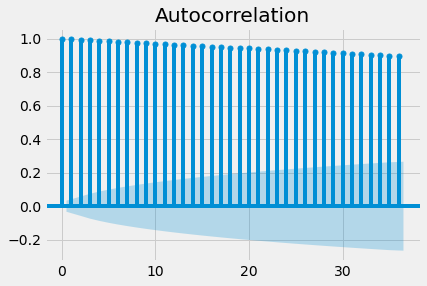

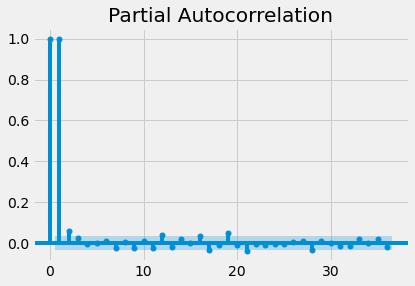

In [101]:
### ARIMA 모델의 p,d,q 확인하기

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_energy)
plot_pacf(df_energy)
plt.show()

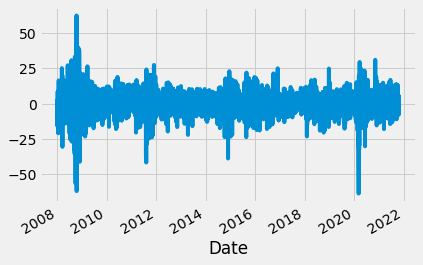

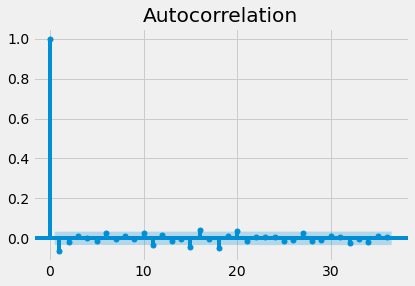

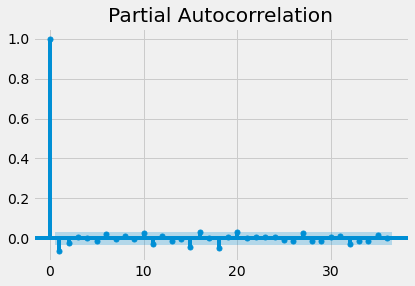

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=df_energy.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [103]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_energy, order=(0,1,2))
model_fit = model.fit(trend='c',full_output=True, disp=100)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 3482
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -12219.723
Method:                       css-mle   S.D. of innovations              8.089
Date:                Thu, 04 Nov 2021   AIC                          24447.446
Time:                        16:17:03   BIC                          24472.068
Sample:                             1   HQIC                         24456.236
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0463      0.126     -0.367      0.713      -0.294       0.201
ma.L1.D.Price    -0.0628      0.017     -3.706      0.000      -0.096      -0.030
ma.L2.D.Price    -0.0165      0.017     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=363.752202, expected=361.800000
predicted=361.877657, expected=357.110000
predicted=357.375157, expected=357.550000
predicted=357.547803, expected=357.390000
predicted=357.324848, expected=367.900000
predicted=367.158380, expected=362.200000
predicted=362.266892, expected=376.020000
predicted=375.149110, expected=372.040000
predicted=371.949166, expected=369.230000
predicted=369.387681, expected=358.000000
predicted=358.705955, expected=359.340000
predicted=359.413585, expected=370.710000
predicted=369.903933, expected=383.350000
predicted=382.237110, expected=386.570000
predicted=386.006111, expected=399.830000
predicted=398.828055, expected=401.670000
predicted=401.212234, expected=401.660000
predicted=401.527545, expected=395.880000
predicted=396.168181, expected=408.940000
predicted=408.163143, expected=415.600000
predicted=414.871370, expected=418.000000
predicted=417.630646, expected=413.600000
predicted=413.747592, expected=416.450000
predicted=416.289593, expected=429

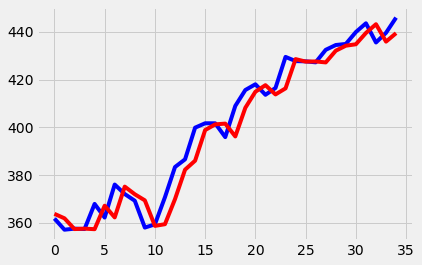

In [104]:
import matplotlib.pyplot as plt

### ARIMA 모형으로 TRAIN과 PREDICTION 시각화.

X = df_energy.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
me = 0
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    me += abs(yhat - obs)
# evaluate forecasts
me =  me/len(test)
print('Test RMSE: %.3f' % me)
# plot forecasts against actual outcomes
plt.plot(test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

predicted=363.752202, expected=361.800000
predicted=363.705678, expected=357.110000
predicted=363.635222, expected=357.550000
predicted=363.564764, expected=357.390000
predicted=363.494307, expected=367.900000
predicted=363.423854, expected=362.200000
predicted=363.353398, expected=376.020000
predicted=363.282947, expected=372.040000
predicted=363.212491, expected=369.230000
predicted=363.142035, expected=358.000000
predicted=363.071579, expected=359.340000
predicted=363.001127, expected=370.710000
predicted=362.930675, expected=383.350000
predicted=362.860219, expected=386.570000
predicted=362.789761, expected=399.830000
predicted=362.719305, expected=401.670000
predicted=362.648849, expected=401.660000
predicted=362.578391, expected=395.880000
predicted=362.507937, expected=408.940000
predicted=362.437478, expected=415.600000
predicted=362.367023, expected=418.000000
predicted=362.296567, expected=413.600000
predicted=362.226113, expected=416.450000
predicted=362.155657, expected=429

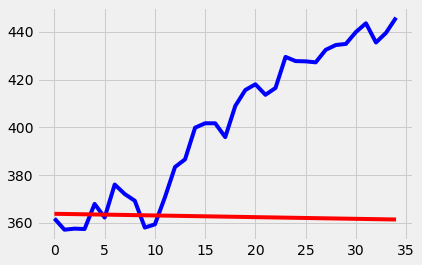

In [105]:
### 위 코드와는 다르게도 시도.

X = df_energy.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
me = 0
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    me += abs(yhat - obs)
# evaluate forecasts
me =  me/len(test)
print('Test RMSE: %.3f' % me)
# plot forecasts against actual outcomes
plt.plot(test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()